<a href="https://colab.research.google.com/github/aso2001054/AI_teach2020/blob/master/2020AI0204_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request as req
import pandas as pd
url ="https://raw.githubusercontent.com/masatokg/JapaneseMeteorologicalAgencySample/master/data_Fukoka.csv"
savefile = "kion20y.csv"
req.urlretrieve(url, savefile)
print("保存しました")
df = pd.read_csv(savefile, encoding="utf-8")

保存しました


In [ ]:
df.head()

,年,月,日,気温,品質,均質
0,1998,1,1,7.9,8,1
1,1998,1,2,8.7,8,1
2,1998,1,3,9.7,8,1
3,1998,1,4,8.5,8,1
4,1998,1,5,6.3,8,1


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("kion20y.csv", encoding="utf-8")

In [ ]:
md = {}
for i, row in df.iterrows():
  m, d, v = (int(row['月']), int(row['日']), float(row['気温']))
  key = str(m) + "/" + str(d)
  if not(key in md): md[key] = []
  md[key] += [v]

In [ ]:
avs = {}
for key in md:
  v = avs[key] = sum(md[key]) / len(md[key])
  print("{0} : {1}".format(key, v))

1/1 : 6.671428571428573
1/2 : 7.323809523809523
1/3 : 7.457142857142857
1/4 : 7.242857142857143
1/5 : 7.019047619047619
1/6 : 7.299999999999998
1/7 : 7.085714285714286
1/8 : 7.323809523809524
1/9 : 6.919047619047621
1/10 : 6.699999999999999
1/11 : 6.938095238095239
1/12 : 6.519047619047621
1/13 : 6.6380952380952385
1/14 : 6.495238095238095
1/15 : 6.333333333333333
1/16 : 6.742857142857144
1/17 : 7.014285714285716
1/18 : 7.2571428571428545
1/19 : 7.052380952380953
1/20 : 7.057142857142857
1/21 : 6.561904761904761
1/22 : 6.157142857142857
1/23 : 5.98095238095238
1/24 : 5.0095238095238095
1/25 : 5.719047619047619
1/26 : 6.161904761904762
1/27 : 6.33809523809524
1/28 : 6.466666666666666
1/29 : 6.604761904761905
1/30 : 7.057142857142857
1/31 : 6.947619047619048
2/1 : 7.114285714285715
2/2 : 6.733333333333333
2/3 : 6.185714285714285
2/4 : 6.366666666666669
2/5 : 6.499999999999998
2/6 : 6.714285714285714
2/7 : 6.861904761904761
2/8 : 6.8428571428571425
2/9 : 7.385714285714287
2/10 : 7.3047619

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("kion20y.csv", encoding="utf-8")

In [ ]:
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count()

月
1      6.712750
2      7.820405
3     10.918280
4     15.724444
5     20.076498
6     23.382063
7     27.661905
8     28.571736
9     24.923016
10    19.859293
11    14.197937
12     8.971889
Name: 気温, dtype: float64


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)


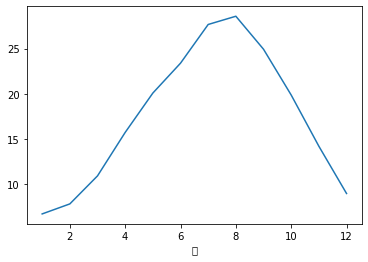

In [ ]:
print(gg)
gg.plot()
plt.savefig("tenki-heikin-tuki.png")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("kion20y.csv", encoding="utf-8")

In [ ]:
atui_bool = (df["気温"] > 30)

In [ ]:
atui = df[atui_bool]

In [ ]:
cnt = atui.groupby(["年"])["年"].count()

年
1998    15
1999     3
2000     9
2001    12
2002     6
2004    17
2005     8
2006    14
2007    11
2008    13
2009     7
2010    27
2011     9
2012    15
2013    37
2014     3
2015     4
2016    20
2017    19
2018    23
Name: 年, dtype: int64


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


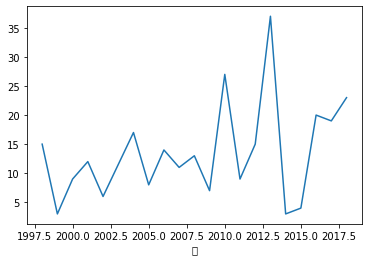

In [ ]:
print(cnt)
cnt.plot()
plt.savefig("tenki-over30.png")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('kion20y.csv', encoding="utf-8")

In [ ]:
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)
interval = 6

In [ ]:
def make_data(data):
  x = []
  y = []
  temps = list(data["気温"])
  for i in range(len(temps)):
    if i < interval: continue
    y.append(temps[i])
    xa = []
    for p in range(interval):
      d = i + p - interval
      xa.append(temps[d])
    x.append(xa)
  return (x, y)
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

In [ ]:
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y)
pre_y = lr.predict(test_x)

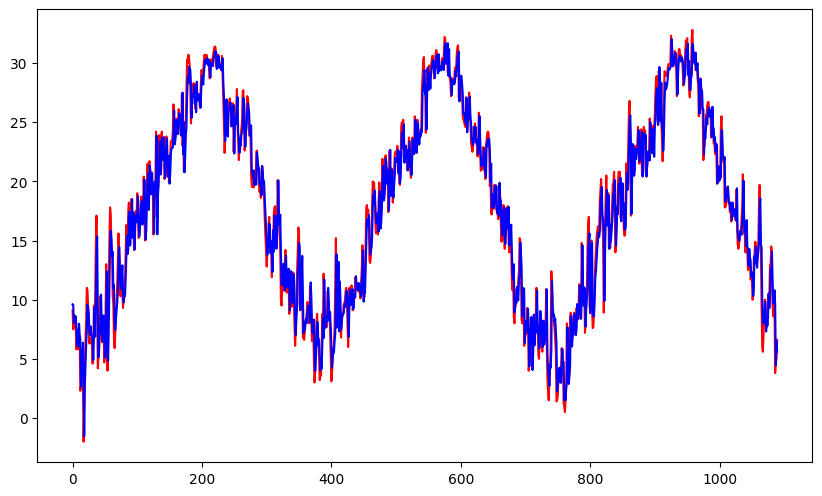

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()